You remember that any periodic signal can be decomposed into a linear combination of sine waves, which form a basis for periodic signals.

For instance, if a signal $x(t)$ is periodic with period $2\pi$, then

$$
x(t) = \sum_{k=-\infty}^{\infty} \hat{x}(k)\, e^{i k t},
$$

where the numbers $\hat{x}(k)$ tell you how much of the $k$-th sine wave (or complex exponential) is present in the signal. Each mode $e^{i k t}$ oscillates $k$ times per period, so the Fourier series simply states that any periodic pattern can be built by stacking these basic oscillations with the right weights.

Below, you can see 5 examples. First, a pure sine wave (pure harmonic). The fourier spectrum is localised at the frequency that exists (change the frequency a bit to see that it will shift in the spectrum as well)

Below we generate three examples:

1. **A pure sine wave (pure harmonic).**  
   In the Fourier domain, only two harmonics appear, at $k = \pm \omega$.  
   *(Try changing the frequency and observe how the spectrum shifts.)*

2. **A Gaussian random field with flat power (white noise).**  
   Each Fourier mode is drawn independently from a Gaussian distribution with variance $1$.

3. **A Gaussian random field with decaying power.**  
   Each Fourier mode is drawn from a Gaussian distribution whose variance decreases as a function of $k$, for example like $k^{-2}$, producing a smoother field dominated by low-frequency modes.

C:\Users\camil\AppData\Local\Temp\ipykernel_36684\2312614557.py:23: RuntimeWarning: divide by zero encountered in divide
  P_target = np.where(k == 0, 0, 1.0 / (k**2))


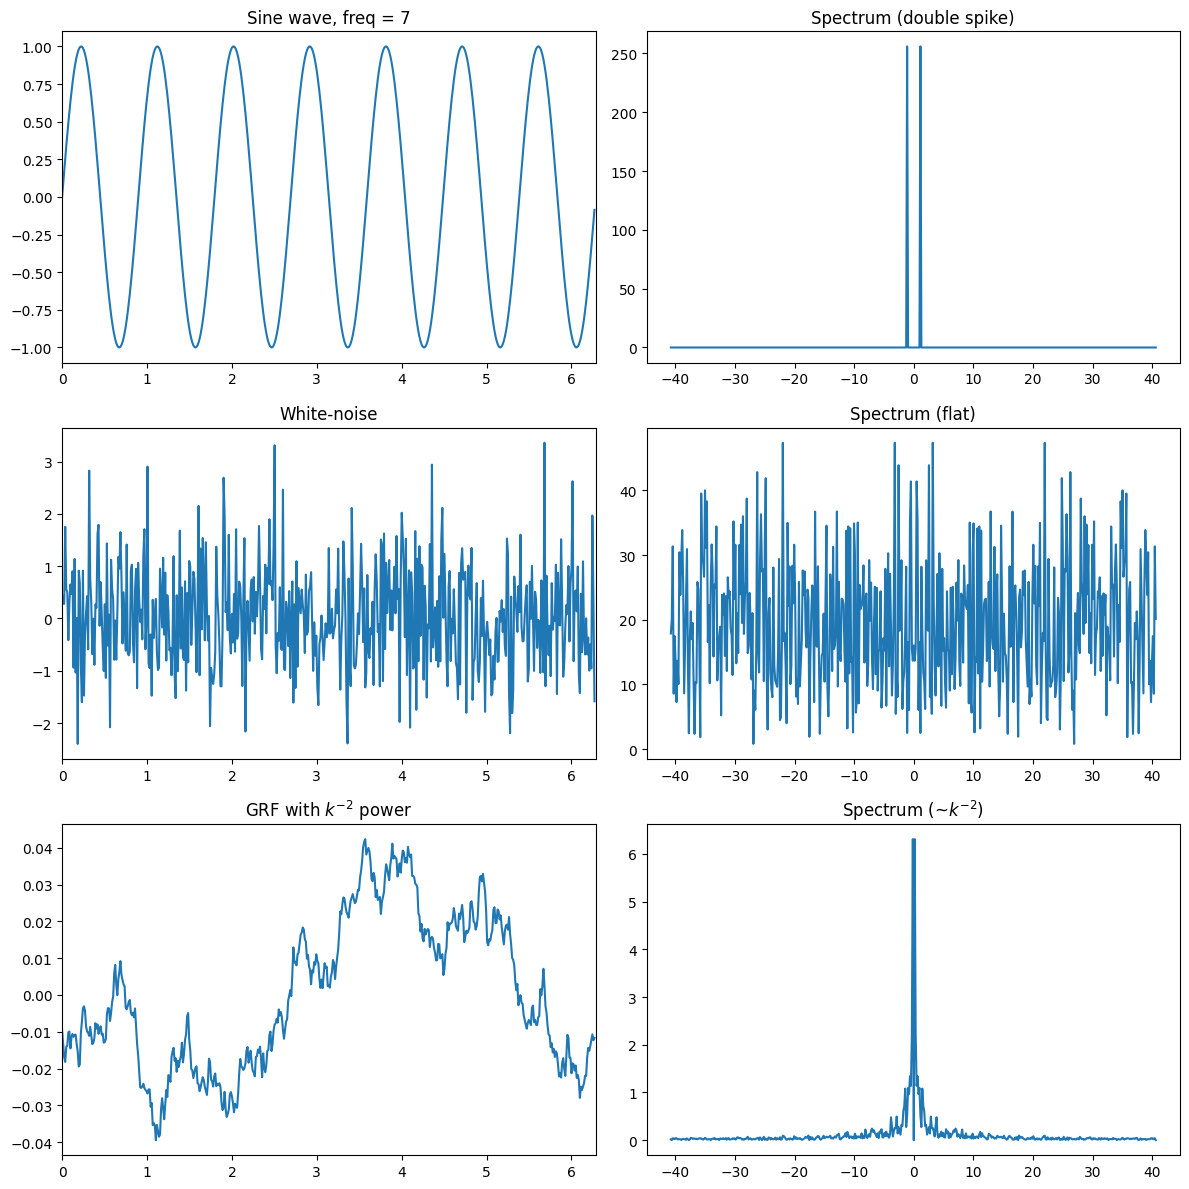

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- grid ---
N = 512
t = np.linspace(0, 2*np.pi, N, endpoint=False)

# --- 1) single sine wave ---
f = 7
x = np.sin(f * t)
X = np.fft.fftshift(np.fft.fft(x))
P = np.abs(X)

# --- 2) white-noise GRF (flat spectrum) ---
grf_white = np.random.normal(size=N)
G_white = np.fft.fftshift(np.fft.fft(grf_white))
P_white = np.abs(G_white)

# --- 3) GRF with k^-2 spectrum ---
k = np.fft.fftshift(np.fft.fftfreq(N, d=(t[1]-t[0])))

# power spectrum ~ 1/k^2, avoid k=0
P_target = np.where(k == 0, 0, 1.0 / (k**2))

# complex Gaussian noise
noise = np.random.normal(size=N) + 1j*np.random.normal(size=N)

# impose spectrum
G_red = np.sqrt(P_target) * noise
G_red_unshift = np.fft.ifftshift(G_red)
grf_red = np.fft.ifft(G_red_unshift).real

# its spectrum
G_red_disp = np.fft.fftshift(np.fft.fft(grf_red))
P_red = np.abs(G_red_disp)

# --- plot ---
plt.figure(figsize=(12,12))

# sine
plt.subplot(3,2,1)
plt.title("Sine wave, freq = {}".format(f))
plt.plot(t, x)
plt.xlim(0, 2*np.pi)

plt.subplot(3,2,2)
plt.title("Spectrum (double spike)")
plt.plot(k, P)

# white noise
plt.subplot(3,2,3)
plt.title("White-noise")
plt.plot(t, grf_white)
plt.xlim(0, 2*np.pi)

plt.subplot(3,2,4)
plt.title("Spectrum (flat)")
plt.plot(k, P_white)

# red noise
plt.subplot(3,2,5)
plt.title("GRF with $k^{-2}$ power")
plt.plot(t, grf_red)
plt.xlim(0, 2*np.pi)

plt.subplot(3,2,6)
plt.title("Spectrum (~$k^{-2}$)")
plt.plot(k, P_red)

plt.tight_layout()
plt.show()

The **power spectrum** describes how the average energy of the signal is distributed across frequencies.  
For a Fourier mode $\hat{x}(k)$, the power spectrum is defined as

$$
P(k) = \mathbb{E}\!\left[\hat{x}(k)\, \hat{x}(k)^{*}\right].
$$

Using the three examples above:

1. **Pure sine wave:**  
   All the power is concentrated in two modes, so  
   $$P(k) = 0 \quad \text{for all } k \neq \pm \omega.$$

2. **White-noise Gaussian random field:**  
   Each mode has the same variance, hence  
   $$P(k) = \text{constant}.$$

3. **Gaussian random field with decaying variance:**  
   High-frequency modes have smaller variance, giving a falling spectrum such as \
   $P(k) \propto k^{-2}.$
   which corresponds to a smoother signal dominated by low-frequency modes.

So far we have only looked at 1D signals. However, as you know this idea can be generalised to images.  
For a 2D discrete signal (an image) we write the pixel values as $x[u]$, where $u = (u_1, u_2)$ is a pixel coordinate.

The 2D discrete Fourier transform (DFT) is defined as

$$
\hat{x}[k] = \sum_{u} x[u] \, e^{- i\, k \cdot u},
$$

where $k = (k_1, k_2)$ is a 2D frequency index.

The inverse transform reconstructs the image from its Fourier coefficients:

$$
x[u] = \frac{1}{N^2} \sum_{k} \hat{x}[k] \, e^{\, i\, k \cdot u }.
$$

Each Fourier mode $\hat{x}[k]$ describes how much of the oscillation $e^{i k \cdot u}$ is present in the image.  
As in 1D, we can interpret $|\hat{x}[k]|^2$ as the **energy per mode**, and the collection of all such values forms the **power spectrum** of the image.

In [ ]:
cat = np.load("cat.npy")
gaussian = np.load("grf.npy")
deleuze = np.load("Deleuze.npy")
print(deleuze.shape)
print(cat.shape)
print(gaussian.shape)
#reshape deleuze to (256,256)
deleuze = deleuze[200:456, 150:406]
print(deleuze.shape)
#deleuze in shades of gray not in RGB
if len(deleuze.shape) == 3:
    deleuze = np.mean(deleuze, axis=2)
print(deleuze.shape)


(800, 526, 3)
(256, 256)
(256, 256)
(256, 256, 3)
(256, 256)


Let's look at an example image and its Fourier modes, as before. Notice that I shift the FFT image such that the mode $\hat{x}[0]$ is at the center of the image. Then, each pixel on the left plot is a Fourier mode. 

In [ ]:
#Choose the image you want to play with
img = gaussian


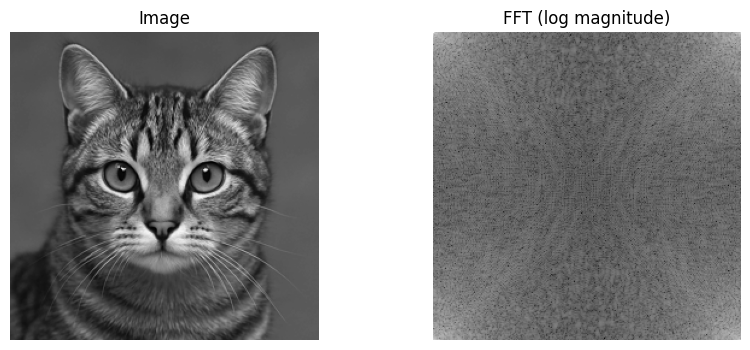

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# load image (grayscale)
I = np.array(img, dtype=float)

# FFT
F = np.fft.fft2(I)
Fshift = np.fft.fftshift(F) #shift = zero mode at the center otherwise it's top left (like in matrices)
P = np.log1p(np.abs(F))   # log-magnitude for visibility

# plot
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Image")
plt.imshow(I, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("FFT (log magnitude)")
plt.imshow(P, cmap="gray")
plt.axis("off")

plt.show()

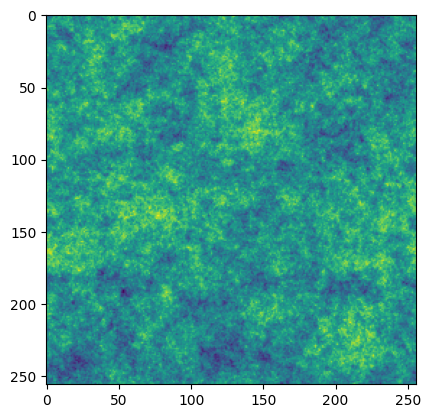

In [ ]:
plt.imshow(np.fft.fftshift(img)) #du à la periodicité (utilisé dans l'espace de Fourier pour mieux visualiser)
plt.imshow(img)

Specific modes correspond to different length scales. To see this, let us keep only a few modes and let the rest vanish. What scales are kept, and which are lost?

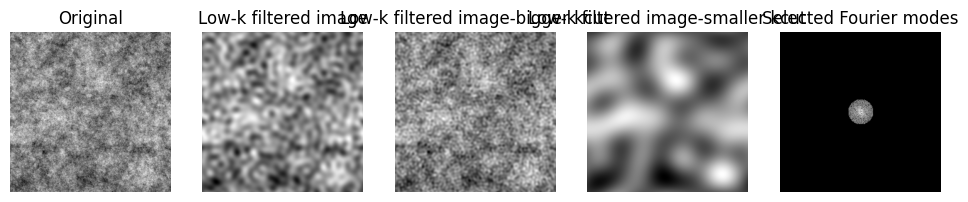

In [ ]:
I = img


N = I.shape[0]

# FFT
F = np.fft.fft2(I)
Fshift = np.fft.fftshift(F)

# low-k filter size (radius)
kcut = 20   # adjust as you want
kcut2 = 50
kcut3 = 5

# build mask
kx = np.arange(-N//2, N//2)
ky = np.arange(-N//2, N//2)
KX, KY = np.meshgrid(kx, ky)
R = np.sqrt(KX**2 + KY**2)

mask = (R < kcut)
mask2 = (R < kcut2)
mask3 = (R < kcut3)
#mask : matrice de booléens qui vaut 1 si R<kcut et 0 sinon, 
#plus la valeur de kcut est grande, plus on garde de modes de Fourier donc l'image est plus claire et proche de l'originale

# apply mask
F_low = Fshift * mask
F_low2 = Fshift * mask2
F_low3 = Fshift * mask3

# inverse FFT to get filtered image
I_low = np.fft.ifft2(np.fft.ifftshift(F_low)).real
I_low2 = np.fft.ifft2(np.fft.ifftshift(F_low2)).real
I_low3 = np.fft.ifft2(np.fft.ifftshift(F_low3)).real


# plot
plt.figure(figsize=(12,4))

plt.subplot(1,5,1)
plt.title("Original")
plt.imshow(I, cmap="gray")
plt.axis("off")

plt.subplot(1,5,2)
plt.title("Low-k filtered image")
plt.imshow(I_low, cmap="gray")
plt.axis("off")

plt.subplot(1,5,3)
plt.title("Low-k filtered image-bigger kcut")
plt.imshow(I_low2, cmap="gray")
plt.axis("off")

plt.subplot(1,5,4)
plt.title("Low-k filtered image-smaller kcut")
plt.imshow(I_low3, cmap="gray")
plt.axis("off")


plt.subplot(1,5,5)
plt.title("Selected Fourier modes")
plt.imshow(np.log1p(np.abs(F_low)), cmap="gray")
plt.axis("off")

plt.show()

Let's do the same but with the rest of the modes now.

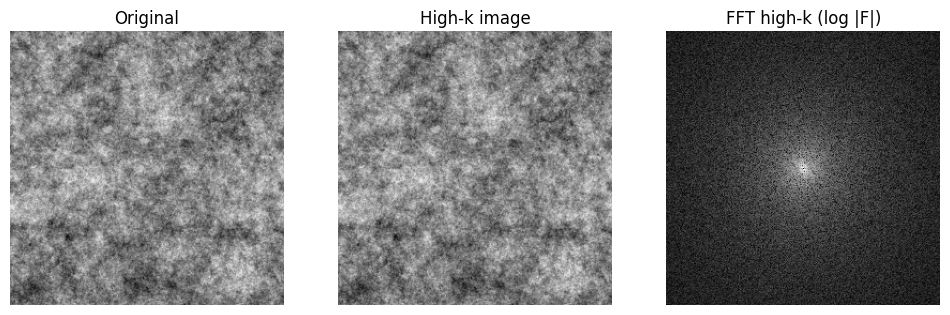

In [ ]:
# original field
I = img
N = I.shape[0]

# FFT
F = np.fft.fft2(I)
Fshift = np.fft.fftshift(F)

# --- circular low-k mask ---
kx = np.arange(-N//2, N//2)
ky = np.arange(-N//2, N//2)
kx, ky = np.meshgrid(kx, ky)
kr = np.sqrt(kx**2 + ky**2)

kcut = 1
mask_low = kr < kcut       # circle

# --- high-k mask = logical NOT of the same mask ---
mask_high = ~mask_low

# keep only high-k modes
F_high = Fshift * mask_high

# inverse transform
F_high_unshift = np.fft.ifftshift(F_high)
I_high = np.fft.ifft2(F_high_unshift).real

# power spectrum for visualization
P_high = np.log1p(np.abs(F_high))

# plot
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(I, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("High-k image")
plt.imshow(I_high, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("FFT high-k (log |F|)")
plt.imshow(P_high, cmap="gray")
plt.axis("off")

plt.show()

Try to plot them side by side. Are the low-k and high-k images correlated? 

Now, let's look at a band between $k_min$ and $k_max$. Try changing the boundaries of the ring to see the effect on the original image

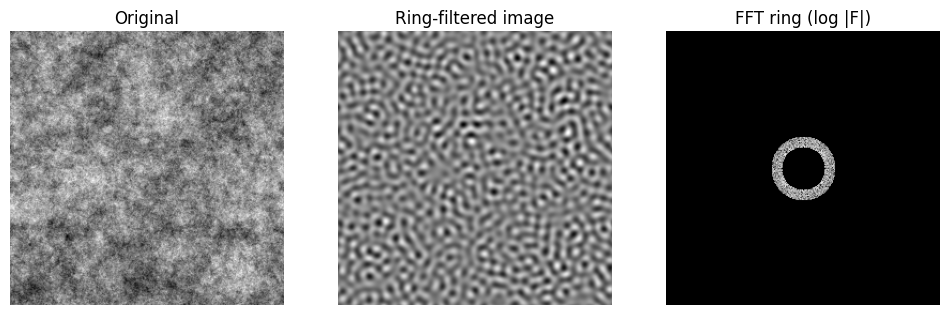

In [ ]:
# original field
I = img
N = I.shape[0]

# FFT
F = np.fft.fft2(I)
Fshift = np.fft.fftshift(F)

# Fourier coordinates
kx = np.arange(-N//2, N//2)
ky = np.arange(-N//2, N//2)
kx, ky = np.meshgrid(kx, ky)
kr = np.sqrt(kx**2 + ky**2)

# ring mask: keep modes with 20 < |k| < 30
kmin, kmax = 20, 30
mask_ring = (kr > kmin) & (kr < kmax)

# apply ring mask
F_ring = Fshift * mask_ring

# inverse FFT
F_ring_unshift = np.fft.ifftshift(F_ring)
I_ring = np.fft.ifft2(F_ring_unshift).real

# spectrum for display
P_ring = np.log1p(np.abs(F_ring))

# plot
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(I, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Ring-filtered image")
plt.imshow(I_ring, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("FFT ring (log |F|)")
plt.imshow(P_ring, cmap="gray")
plt.axis("off")

plt.show()

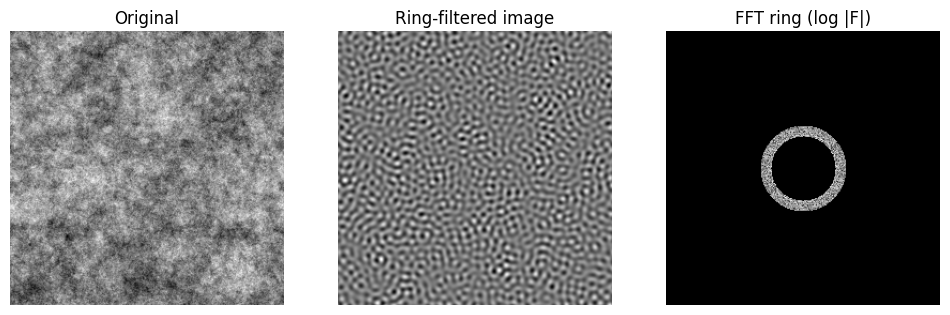

In [ ]:
# reset fields
I = img
N = I.shape[0]

# FFT
F = np.fft.fft2(I)
Fshift = np.fft.fftshift(F)

# Fourier coordinates
kx = np.arange(-N//2, N//2)
ky = np.arange(-N//2, N//2)
kx, ky = np.meshgrid(kx, ky)
kr = np.sqrt(kx**2 + ky**2)

# ring mask: keep modes with 20 < |k| < 30
kmin, kmax = 30, 40
mask_ring = (kr > kmin) & (kr < kmax)

# apply ring mask
F_ring = Fshift * mask_ring

# inverse FFT
F_ring_unshift = np.fft.ifftshift(F_ring)
I_ring = np.fft.ifft2(F_ring_unshift).real

# spectrum for display
P_ring = np.log1p(np.abs(F_ring))

# plot
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(I, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Ring-filtered image")
plt.imshow(I_ring, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("FFT ring (log |F|)")
plt.imshow(P_ring, cmap="gray")
plt.axis("off")

plt.show()

All the filters we applied to the FFT were symmetric around the mode $k = 0$.  
As a result, the filtered images were also rotationally invariant — they had no preferred direction.

To break this symmetry, we can choose a band-pass filter that keeps modes in a **small off-center region** of Fourier space. One simple choice is a Gaussian-shaped filter centered at a nonzero frequency $(k_{x0}, k_{y0})$:

$$
\hat{\psi}(k_x, k_y)
=
\exp\!\left(
-\frac{(k_x - k_{x0})^2 + (k_y - k_{y0})^2}{2\sigma^2}
\right).
$$

This filter passes only the modes lying near $(k_{x0}, k_{y0})$ and suppresses all others.  
Because it is not centered at $k=0$, it introduces a preferred direction and wavelength into the filtered image.

Try changing the center and the variance of the filter to see the effect that it has on the image. 

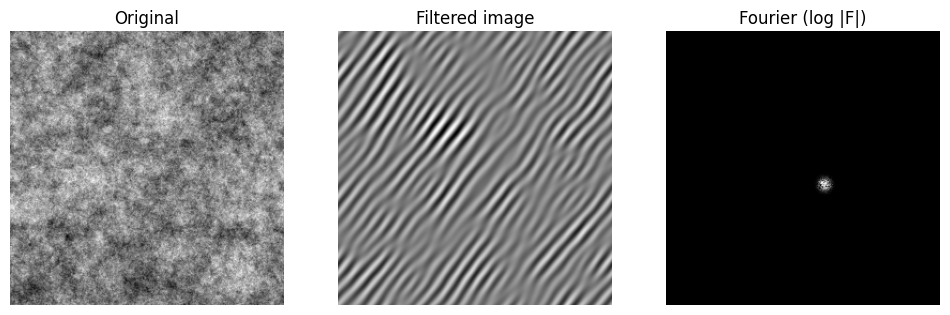

In [ ]:
# original field
I = img
N = I.shape[0]

# FFT
F = np.fft.fft2(I)
Fshift = np.fft.fftshift(F)

# Fourier coordinates
kx = np.arange(-N//2, N//2)
ky = np.arange(-N//2, N//2)
kx, ky = np.meshgrid(kx, ky)

# --- Morlet parameters ---
kx0, ky0 = 20, 15    # center in Fourier space
sigma = 3          # width of Gaussian bump

# Morlet wavelet in Fourier space (no external library)
Morlet = np.exp(-((kx - kx0)**2 + (ky - ky0)**2) / (2*sigma**2))

# Apply as band-pass filter
F_morlet = Fshift * Morlet

# inverse FFT
F_m_unshift = np.fft.ifftshift(F_morlet)
I_morlet = np.fft.ifft2(F_m_unshift).real

# spectrum for display
P_morlet = np.log1p(np.abs(F_morlet))

# plots
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(I, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Filtered image")
plt.imshow(I_morlet, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Fourier (log |F|)")
plt.imshow(P_morlet, cmap="gray")
plt.axis("off")

plt.show()

By the way, so far we have only been talking about filters as masks applied directly in Fourier space.  
In pixel space, this operation is exactly the same as a convolution, because multiplying by a filter $W(k)$ in Fourier space corresponds to convolving the image with the inverse Fourier transform of that filter:

$$
x_{\text{filtered}}[u]
= \mathcal{F}^{-1}\!\left( \hat{\psi}(k)\, \hat{x}(k) \right)
= \left( \psi * x \right)[u],
$$

where

$$
w[u] = \mathcal{F}^{-1}\!\big( W(k) \big)
$$

is the convolution kernel associated with the chosen Fourier mask.

Now, please go back and run the entire notebook with the image of a cat, instead of the gaussian field. 

**Main question** : What do you observe? Are the filtered images at different oriented scales correlated with each other when the image is a Gaussian random field? What happens when the iamge is a cat? 

Now, you should be able to explain to yourself the Marilyn Einstein illusion that you saw at the lab :) 

A **Gaussian random field** is a collection of pixel values $x[u]$ (with $u$ a pixel coordinate) such that the full vector $x$ is jointly a Gaussian random variable. Its statistics are completely fixed once we specify the mean and the covariance. We take the field to have zero mean, and we assume **homogeneity**, meaning the covariance depends only on the separation between pixels:
$$
\mathbb{E}[\,x[u]\,x[v]\,] = C(u-v).
$$

This assumption alone is enough to understand why the Fourier modes behave so simply.

The **power spectrum** is defined as the discrete Fourier transform of $C$:
$$
P(k) = \sum_{r} C(r)\, e^{-i k\cdot r}.
$$

To see why this implies independent Fourier modes, write the Fourier coefficients
$$
\hat{x}(k) = \sum_{u} x[u]\, e^{-i k\cdot u}.
$$
Since $\hat{x}(k)$ is a linear combination of jointly Gaussian variables, each $\hat{x}(k)$ is itself Gaussian. A short computation shows that the covariance of two Fourier modes is
$$
\mathbb{E}\!\left[\hat{x}(k)\,\hat{x}(k')^{*}\right]
   = P(k)\,\delta_{k,k'}.
$$

Thus, for a homogeneous Gaussian field:

1. **Different Fourier modes are uncorrelated**, and hence independent.  
2. **Each mode has variance $P(k)$**, so the power spectrum directly sets the amplitude of fluctuations at scale $k$.  
3. **Modes with the same $|k|$ have the same statistical distribution**, meaning the power spectrum organizes fluctuations by scale.

Therefore, once a field is specified only through its power spectrum $P(k)$ and assumed to be Gaussian and homogeneous, the entire structure of the field follows: the Fourier modes are independent Gaussian variables with variances given by $P(k)$, and the statistical notion of “scale” is encoded directly in the magnitude of $k$.

In the example of the image of a cat, and in fact every non-Gaussian image, you observe that this statistical independence is **not true**.

**Problem** Can you think of a way to quantify the dependency between different oriented scales of an image?

Here you can start understanding one of the main motivations for using scattering transforms. They are a way to quantify the statistical dependency between different scales.